In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("praveengovi/credit-risk-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 148k/148k [00:00<00:00, 11.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/praveengovi/credit-risk-classification-dataset/versions/1


In [4]:
import os

customer_df = pd.read_csv(os.path.join(path, 'customer_data.csv'))
payment_df = pd.read_csv(os.path.join(path, 'payment_data.csv'))


In [5]:
print(f" Customer data: {customer_df.shape[0]} lignes × {customer_df.shape[1]} colonnes")
print(f" Payment data: {payment_df.shape[0]} lignes × {payment_df.shape[1]} colonnes")


 Customer data: 1125 lignes × 13 colonnes
 Payment data: 8250 lignes × 12 colonnes


In [6]:
customer_df.head(10)


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
5,0,59005995,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000
6,1,59001917,4,1304.0,3,35000.0,2,8,9,85,5,60069,1.000000
7,1,54984789,5,1256.0,3,78000.0,2,15,-1,111,3,60030,1.000000
8,0,58984557,5,1323.5,3,218000.0,2,15,5,112,4,151300,282.842713
9,0,54990497,4,NaN,2,35000.0,2,8,5,101,3,60029,237.301496


In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [8]:
customer_df.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [9]:
numeric_customer = customer_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_customer = ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']  # Features catégorielles encodées


In [10]:
if 'label' in numeric_customer:
    numeric_customer.remove('label')
if 'id' in numeric_customer:
    numeric_customer.remove('id')

print(f"\n Variables numériques: {numeric_customer}")
print(f" Variables catégorielles encodées: {categorical_customer}")



 Variables numériques: ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11']
 Variables catégorielles encodées: ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']


In [14]:
print(" Distribution du RISQUE DE CRÉDIT:")
print(customer_df['label'].value_counts())
print(f"\nProportions:")
print(customer_df['label'].value_counts(normalize=True) * 100)


 Distribution du RISQUE DE CRÉDIT:
label
0    900
1    225
Name: count, dtype: int64

Proportions:
label
0    80.0
1    20.0
Name: proportion, dtype: float64


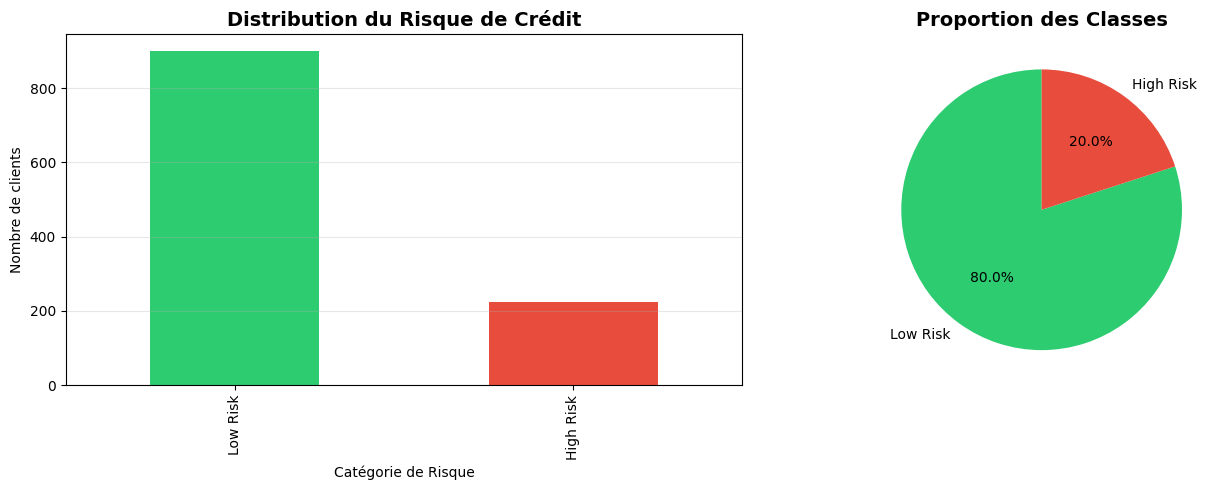

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

labels_map = {0: 'Low Risk', 1: 'High Risk'}
customer_df['label'].map(labels_map).value_counts().plot(
    kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c']
)
axes[0].set_title('Distribution du Risque de Crédit', fontsize=14, weight='bold')
axes[0].set_xlabel('Catégorie de Risque')
axes[0].set_ylabel('Nombre de clients')
axes[0].grid(axis='y', alpha=0.3)
customer_df['label'].map(labels_map).value_counts().plot(
    kind='pie', ax=axes[1], autopct='%1.1f%%',
    colors=['#2ecc71', '#e74c3c'], startangle=90
)
axes[1].set_title('Proportion des Classes', fontsize=14, weight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
class_ratio = customer_df['label'].value_counts().min() / customer_df['label'].value_counts().max()
print(f"\n Ratio de déséquilibre: {class_ratio:.2%}")
if class_ratio < 0.3:
    print(" Classes déséquilibrées! Stratégies de rééquilibrage à prévoir (SMOTE, class_weight)")



 Ratio de déséquilibre: 25.00%
 Classes déséquilibrées! Stratégies de rééquilibrage à prévoir (SMOTE, class_weight)


 Valeurs manquantes:
      Colonne  Nb_Missing  Pct_Missing
fea_2   fea_2         149    13.244444


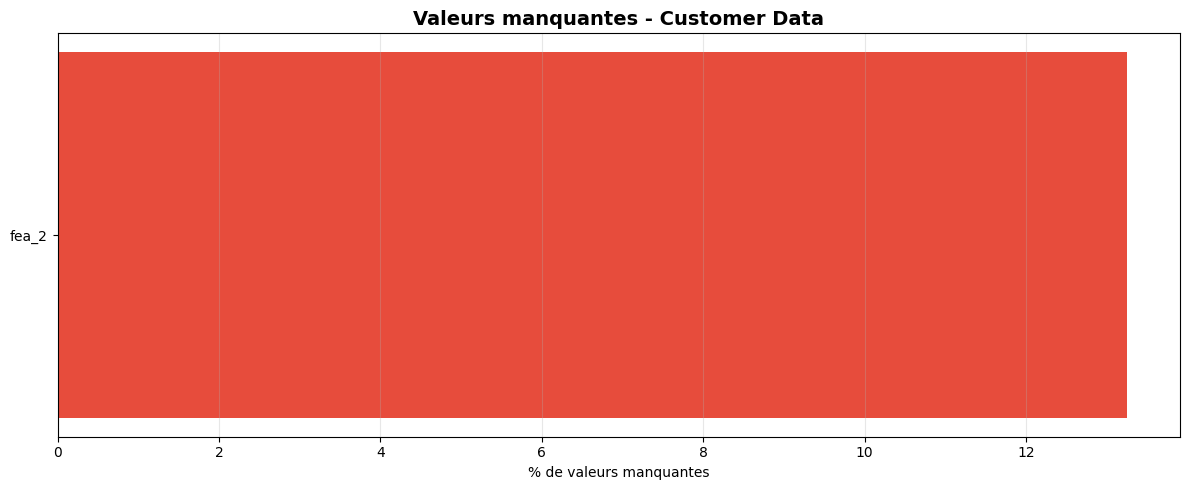

In [18]:
missing_customer = pd.DataFrame({
    'Colonne': customer_df.columns,
    'Nb_Missing': customer_df.isnull().sum(),
    'Pct_Missing': (customer_df.isnull().sum() / len(customer_df)) * 100
})
missing_customer = missing_customer[missing_customer['Nb_Missing'] > 0].sort_values('Pct_Missing', ascending=False)

if len(missing_customer) == 0:
    print(" Aucune valeur manquante dans customer_data!")
else:
    print(" Valeurs manquantes:")
    print(missing_customer)

    plt.figure(figsize=(12, 5))
    plt.barh(missing_customer['Colonne'], missing_customer['Pct_Missing'], color='#e74c3c')
    plt.xlabel('% de valeurs manquantes')
    plt.title('Valeurs manquantes - Customer Data', fontsize=14, weight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


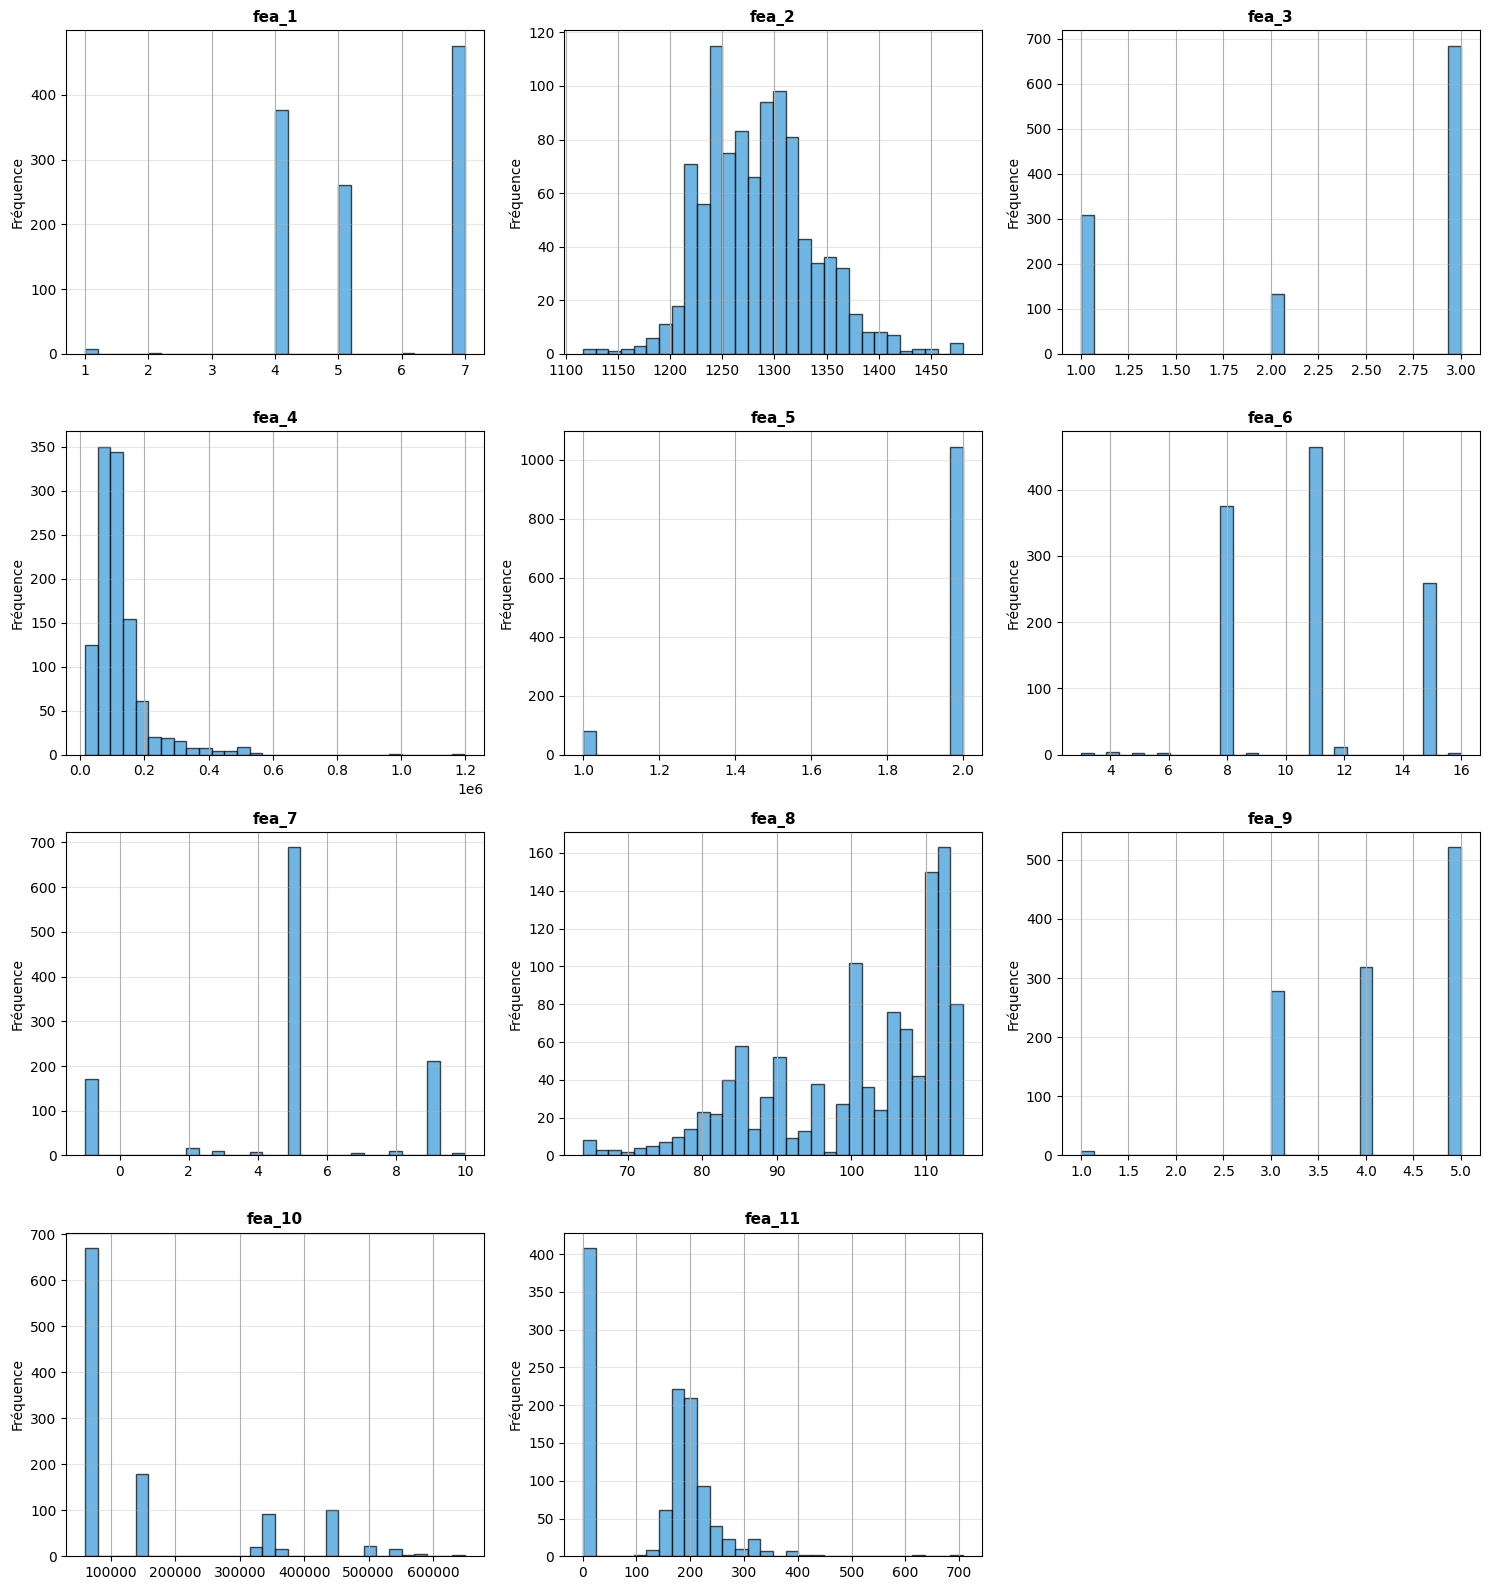

In [19]:
n_cols = 3
n_rows = (len(numeric_customer) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_customer):
    customer_df[col].hist(bins=30, ax=axes[idx], color='#3498db', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=11, weight='bold')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(len(numeric_customer), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

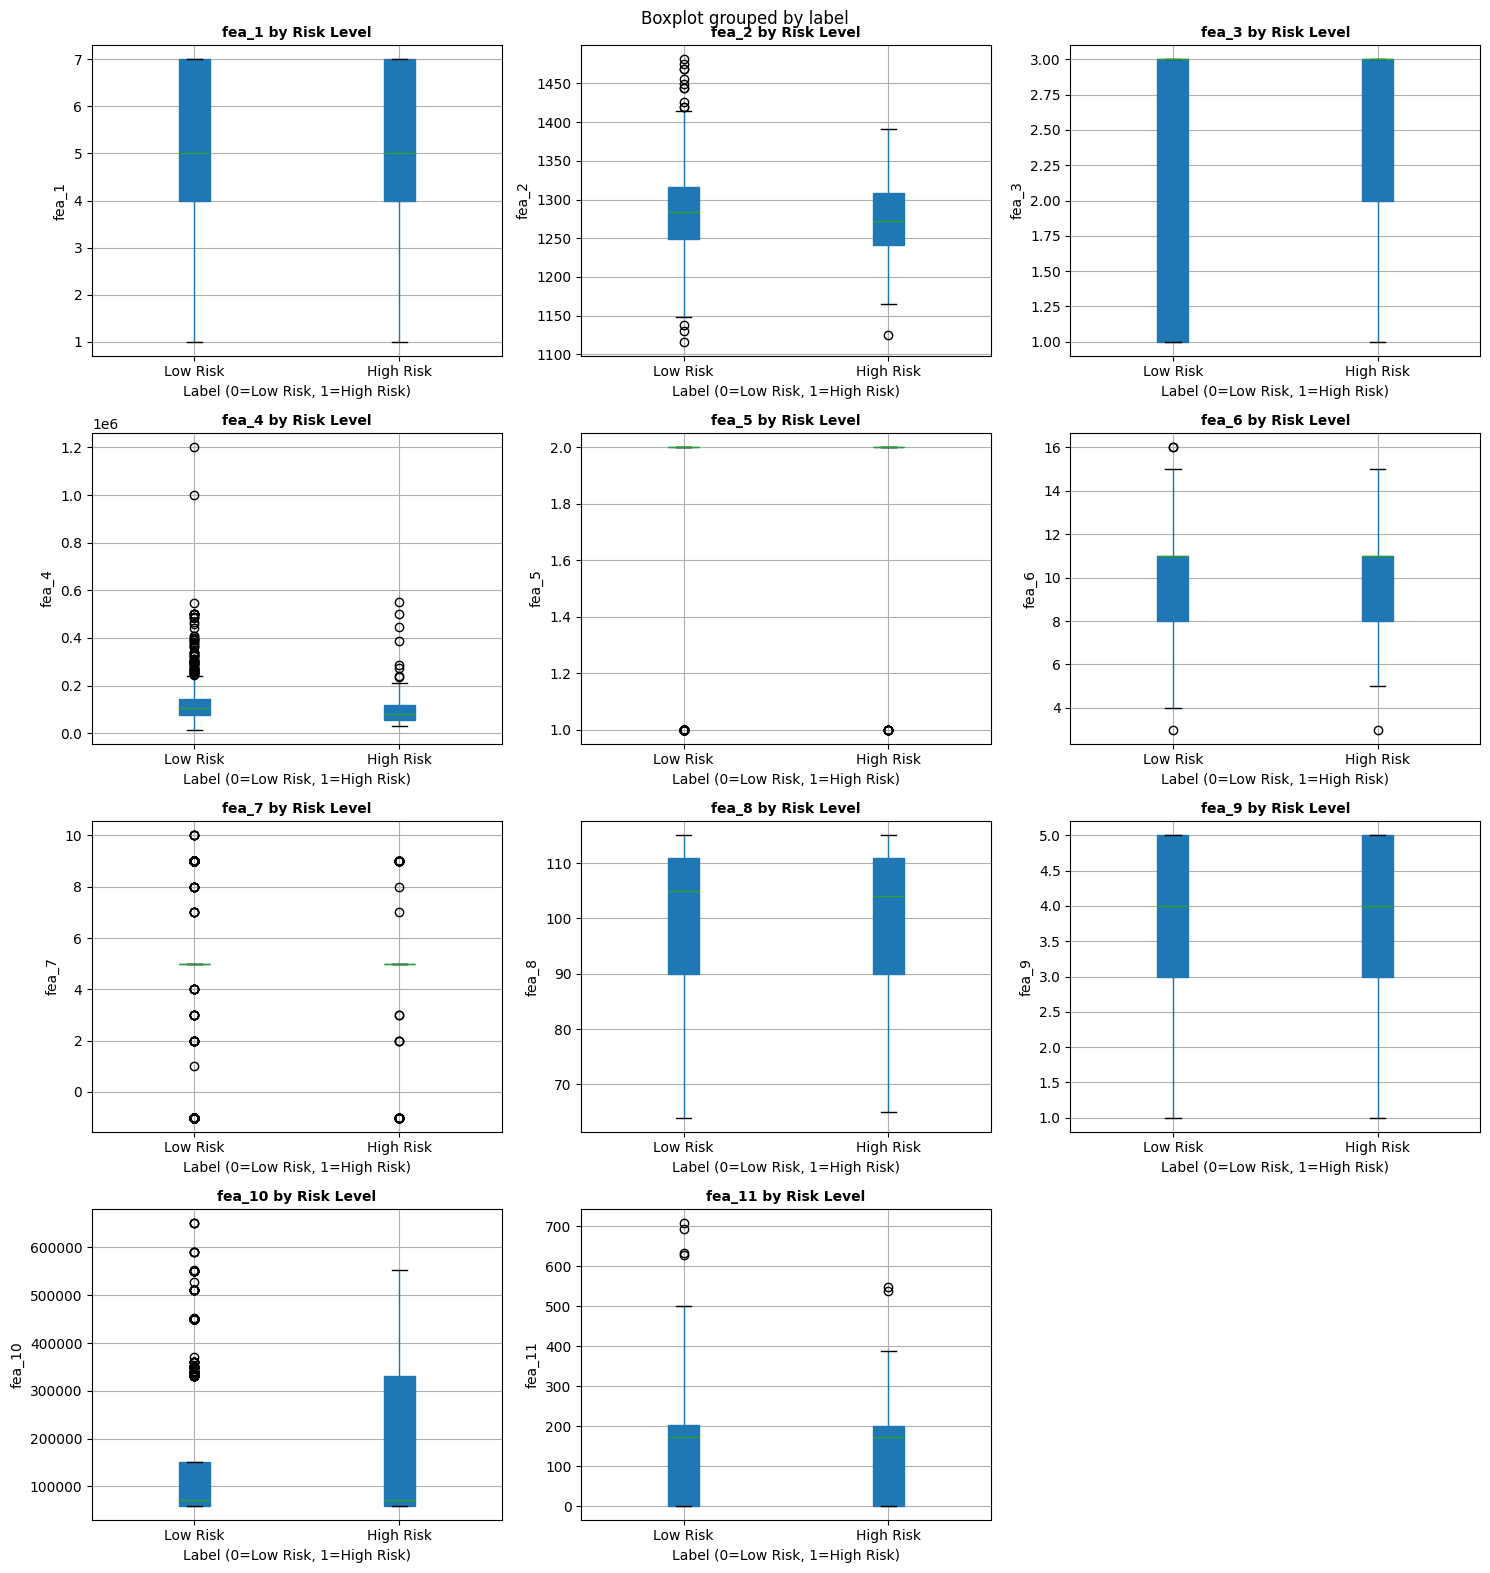

In [20]:
n_cols = 3
n_rows = (len(numeric_customer) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_customer):
    customer_df.boxplot(column=col, by='label', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{col} by Risk Level', fontsize=10, weight='bold')
    axes[idx].set_xlabel('Label (0=Low Risk, 1=High Risk)')
    axes[idx].set_ylabel(col)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Low Risk', 'High Risk'])

for idx in range(len(numeric_customer), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


PAYMENT DATA - Exploration

In [21]:
payment_df.head(10)


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
5,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016
6,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN
7,54987756,0,0,0,0,2,1,NaN,02/12/2016,365331.6,304943.0,NaN
8,58988028,0,0,0,0,4,0,NaN,02/12/2016,16795.2,28500.0,19/04/2016
9,58993180,0,0,0,0,3,6,NaN,02/12/2016,26688.0,31300.0,20/03/2016


In [22]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [23]:
payment_df.describe()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


In [25]:
print("\n Période couverte:")
if 'update_date' in payment_df.columns:
    payment_df['update_date'] = pd.to_datetime(payment_df['update_date'], errors='coerce')
    print(f"Première date: {payment_df['update_date'].min()}")
    print(f"Dernière date: {payment_df['update_date'].max()}")

if 'report_date' in payment_df.columns:
    payment_df['report_date'] = pd.to_datetime(payment_df['report_date'], errors='coerce')



 Période couverte:
Première date: 1993-02-10 00:00:00
Dernière date: 2016-05-10 00:00:00


In [26]:
payments_per_customer = payment_df['id'].value_counts()
print(f"\n Statistiques des paiements par client:")
print(f"Moyenne: {payments_per_customer.mean():.1f} lignes/client")
print(f"Médiane: {payments_per_customer.median():.0f} lignes/client")
print(f"Max: {payments_per_customer.max()} lignes/client")



 Statistiques des paiements par client:
Moyenne: 7.3 lignes/client
Médiane: 6 lignes/client
Max: 55 lignes/client


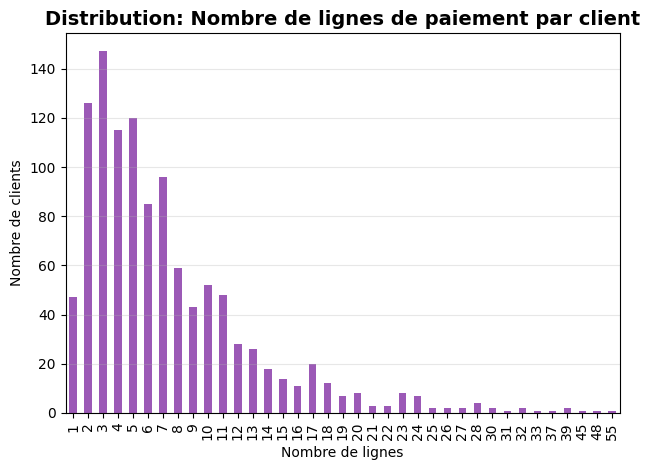

In [27]:
payments_per_customer.value_counts().sort_index().plot(kind='bar', color='#9b59b6')
plt.title('Distribution: Nombre de lignes de paiement par client', fontsize=14, weight='bold')
plt.xlabel('Nombre de lignes')
plt.ylabel('Nombre de clients')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

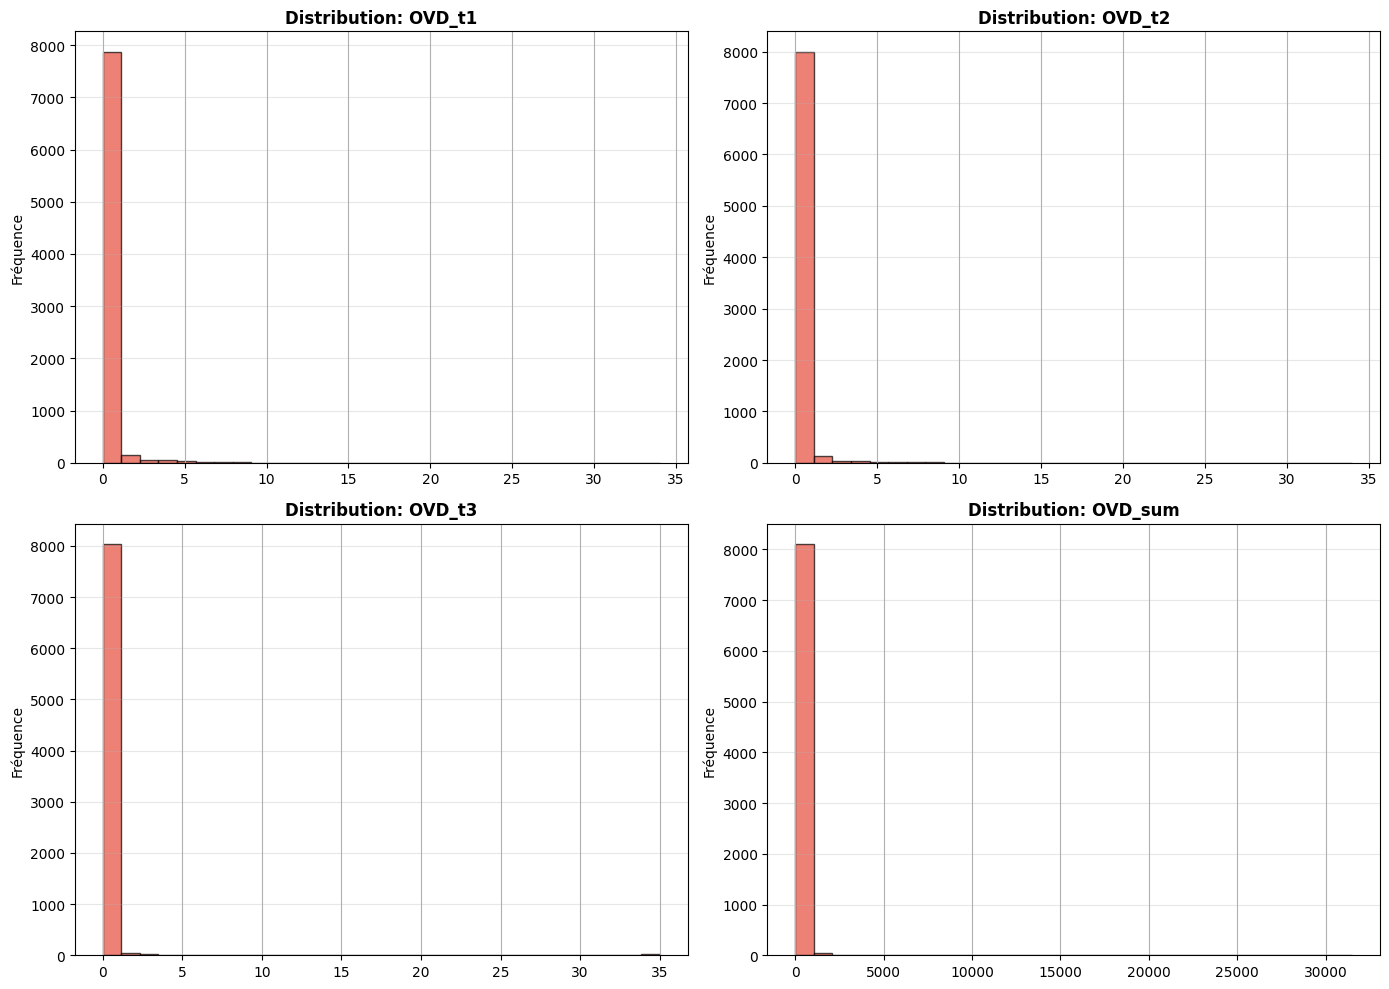

In [28]:
overdue_cols = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(overdue_cols):
    payment_df[col].hist(bins=30, ax=axes[idx], color='#e74c3c', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution: {col}', fontsize=12, weight='bold')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Statistiques sur les retards

In [29]:
print(payment_df[overdue_cols].describe())


            OVD_t1       OVD_t2       OVD_t3       OVD_sum
count  8250.000000  8250.000000  8250.000000   8250.000000
mean      0.249091     0.127152     0.369212    187.681697
std       1.250197     0.860046     2.900320   1804.232570
min       0.000000     0.000000     0.000000      0.000000
25%       0.000000     0.000000     0.000000      0.000000
50%       0.000000     0.000000     0.000000      0.000000
75%       0.000000     0.000000     0.000000      0.000000
max      34.000000    34.000000    35.000000  31500.000000


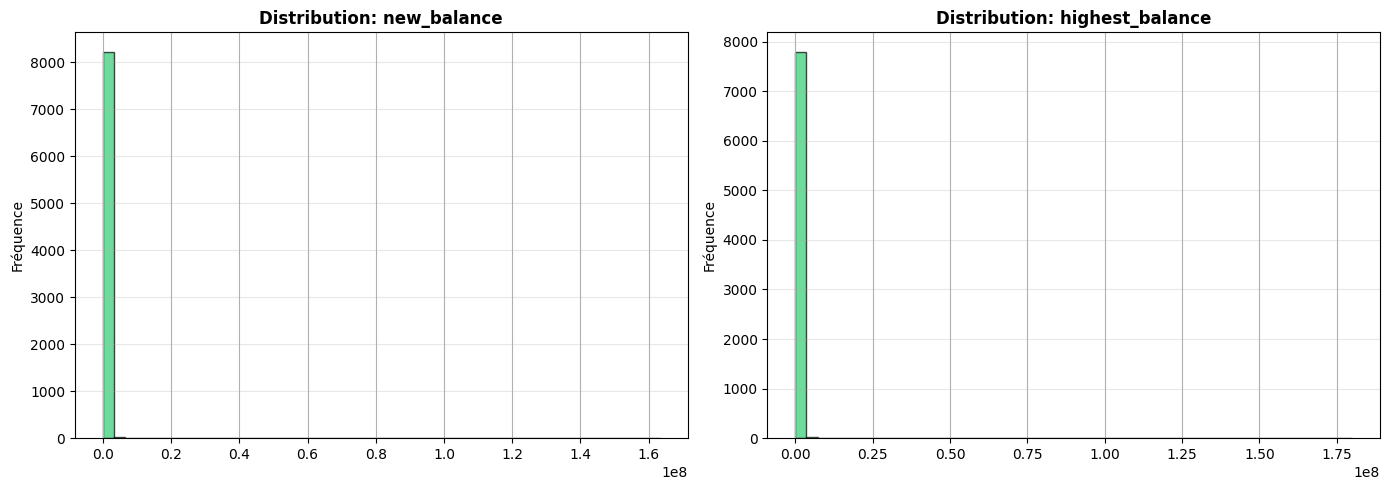

In [30]:
balance_cols = ['new_balance', 'highest_balance']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, col in enumerate(balance_cols):
    payment_df[col].hist(bins=50, ax=axes[idx], color='#2ecc71', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution: {col}', fontsize=12, weight='bold')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
missing_payment = pd.DataFrame({
    'Colonne': payment_df.columns,
    'Nb_Missing': payment_df.isnull().sum(),
    'Pct_Missing': (payment_df.isnull().sum() / len(payment_df)) * 100
})
missing_payment = missing_payment[missing_payment['Nb_Missing'] > 0].sort_values('Pct_Missing', ascending=False)

if len(missing_payment) == 0:
    print(" Aucune valeur manquante dans payment_data!")
else:
    print("🔍 Valeurs manquantes:")
    print(missing_payment)

🔍 Valeurs manquantes:
                         Colonne  Nb_Missing  Pct_Missing
prod_limit            prod_limit        6118    74.157576
update_date          update_date        4927    59.721212
report_date          report_date        1114    13.503030
highest_balance  highest_balance         409     4.957576


Agrégation des données de paiement par client

In [33]:
payment_agg = payment_df.groupby('id').agg({

    'OVD_t1': ['sum', 'mean', 'max'],
    'OVD_t2': ['sum', 'mean', 'max'],
    'OVD_t3': ['sum', 'mean', 'max'],
    'OVD_sum': ['sum', 'mean', 'max', 'std'],

    'pay_normal': ['sum', 'mean'],

    'new_balance': ['mean', 'max', 'min', 'std'],
    'highest_balance': ['mean', 'max'],

    'prod_limit': ['mean', 'max'],

    'prod_code': 'count'
}).reset_index()

payment_agg.columns = ['_'.join(col).strip('_') for col in payment_agg.columns.values]
payment_agg.rename(columns={'id': 'id'}, inplace=True)

print(f" Features agrégées créées: {payment_agg.shape}")
payment_agg.head()


 Features agrégées créées: (1125, 25)


,id,OVD_t1_sum,OVD_t1_mean,OVD_t1_max,OVD_t2_sum,OVD_t2_mean,OVD_t2_max,OVD_t3_sum,OVD_t3_mean,OVD_t3_max,...,pay_normal_mean,new_balance_mean,new_balance_max,new_balance_min,new_balance_std,highest_balance_mean,highest_balance_max,prod_limit_mean,prod_limit_max,prod_code_count
0,54982353,3,0.166667,1,2,0.111111,2,38,2.111111,35,...,12.722222,42033.133333,326684.4,-1197.6,95414.365020,246583.714286,775030.0,259600.0,660000.0,18
1,54982356,0,0.000000,0,0,0.000000,0,0,0.000000,0,...,16.714286,2277.771429,15938.4,0.0,6023.771407,196649.285714,600500.0,330000.0,330000.0,7
2,54982387,3,0.272727,2,0,0.000000,0,0,0.000000,0,...,22.363636,117455.127273,917833.2,0.0,285177.439067,238270.000000,1200500.0,109450.0,330000.0,11
3,54982463,0,0.000000,0,0,0.000000,0,0,0.000000,0,...,17.000000,39890.400000,79780.8,0.0,56413.544688,78500.000000,100500.0,NaN,NaN,2
4,54982530,0,0.000000,0,0,0.000000,0,0,0.000000,0,...,14.000000,1261.200000,4371.6,0.0,2097.743473,12787.750000,24117.0,94600.0,134200.0,4


In [34]:
df_merged = customer_df.merge(payment_agg, on='id', how='left')


In [36]:
print(f" Tables fusionnées: {df_merged.shape[0]} lignes × {df_merged.shape[1]} colonnes")
df_merged.head()

 Tables fusionnées: 1125 lignes × 37 colonnes


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,pay_normal_mean,new_balance_mean,new_balance_max,new_balance_min,new_balance_std,highest_balance_mean,highest_balance_max,prod_limit_mean,prod_limit_max,prod_code_count
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,8.500000,40112.400000,153792.0,0.0,75851.355441,91298.000000,150500.0,60500.000000,60500.0,4
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,11.600000,2040.480000,15120.0,0.0,4377.979678,74837.000000,360500.0,69666.666667,129800.0,15
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,...,10.666667,109178.800000,273850.8,-9560.4,107003.819658,118865.666667,250500.0,102300.000000,102300.0,6
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,...,23.000000,4069.800000,16332.0,-52.8,8174.837892,90449.500000,160500.0,92400.000000,127600.0,4
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,...,21.444444,260363.333333,1602807.6,0.0,508650.515248,395634.333333,1500500.0,154733.333333,247500.0,9


In [37]:
missing_payments = df_merged[df_merged['OVD_sum_sum'].isnull()]
print(f"\n Clients sans historique de paiement: {len(missing_payments)} ({len(missing_payments)/len(df_merged)*100:.1f}%)")



 Clients sans historique de paiement: 0 (0.0%)


Création de features dérivées...

In [38]:
df_clean = df_merged.copy()

Ratio de retards

In [39]:
df_clean['overdue_rate'] = df_clean['OVD_sum_sum'] / (df_clean['pay_normal_sum'] + df_clean['OVD_sum_sum'] + 1)


Utilisation du crédit

In [40]:
df_clean['credit_utilization'] = df_clean['new_balance_mean'] / (df_clean['prod_limit_mean'] + 1)


Ratio solde actuel / solde max

In [41]:
df_clean['balance_ratio'] = df_clean['new_balance_mean'] / (df_clean['highest_balance_mean'] + 1)

Variabilité des retards

In [42]:
df_clean['overdue_volatility'] = df_clean['OVD_sum_std'].fillna(0)


Scoring de comportement de paiement

In [44]:
df_clean['payment_score'] = (
    df_clean['pay_normal_mean'] * 2 -
    df_clean['OVD_sum_mean'] * 5 -
    df_clean['OVD_t3_sum'] * 10
)

In [45]:
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in [np.float64, np.int64]:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)


/tmp/ipython-input-1319537069.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


Détection et traitement des outliers

In [48]:
from scipy.stats.mstats import winsorize

numeric_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_clean = [col for col in numeric_cols_clean if col not in ['id', 'label']]

for col in numeric_cols_clean:
    df_clean[col] = winsorize(df_clean[col], limits=[0.01, 0.01])

print(f" Outliers traités sur {len(numeric_cols_clean)} colonnes")

 Outliers traités sur 40 colonnes


Matrice de corrélation finale

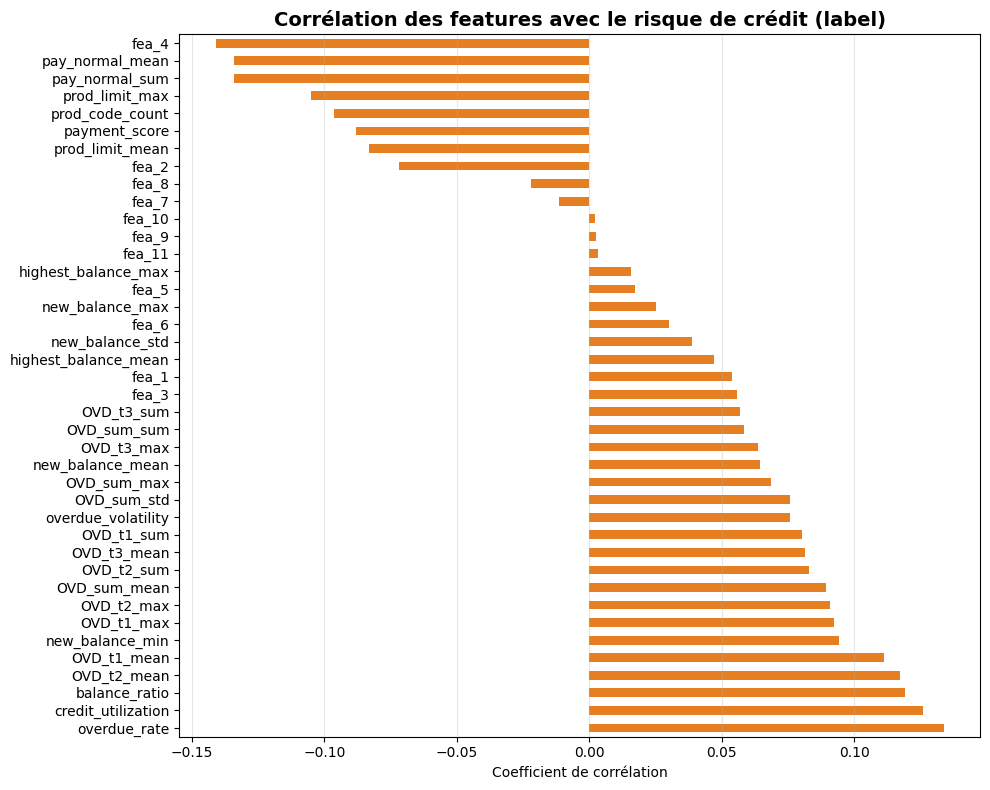

In [49]:
corr_with_target = df_clean[numeric_cols_clean + ['label']].corr()['label'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
corr_with_target.drop('label').plot(kind='barh', color='#e67e22')
plt.title('Corrélation des features avec le risque de crédit (label)', fontsize=14, weight='bold')
plt.xlabel('Coefficient de corrélation')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
print("\n Top 10 features corrélées avec le risque:")
print(corr_with_target.drop('label').head(10))


 Top 10 features corrélées avec le risque:
overdue_rate          0.133812
credit_utilization    0.126017
balance_ratio         0.119376
OVD_t2_mean           0.117531
OVD_t1_mean           0.111204
new_balance_min       0.094497
OVD_t1_max            0.092407
OVD_t2_max            0.090790
OVD_sum_mean          0.089381
OVD_t2_sum            0.082965
Name: label, dtype: float64


In [51]:
df_clean.to_csv('credit_risk_clean_merged.csv', index=False)
print(" Dataset final sauvegardé: credit_risk_clean_merged.csv")


 Dataset final sauvegardé: credit_risk_clean_merged.csv
